<a href="https://colab.research.google.com/github/JustSurWHYving/cloud-coverage-detection/blob/main/attention_model_rnn_ensemble_convnet_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np # linear algebra
import pandas as pd

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

In [4]:

import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/time-series-cloud-cover-forecasting/train.csv',low_memory=False)
df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [5]:
df=df.iloc[:-30000, :]
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.30,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.90,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.80,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.00,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.50,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497035,12-Nov,03:55,-0.971774,-0.696220,90.63494,-4.293,-4.311,-4.411,99.00,0.0,1.20,58.17,811.758,0.0,0.864,1.0,0.0
497036,12-Nov,03:56,-0.979429,-0.720908,90.79298,-4.301,-4.331,-4.431,98.90,0.0,1.20,65.84,811.726,0.0,0.831,1.0,0.0
497037,12-Nov,03:57,-0.992569,-0.760409,90.95064,-4.315,-4.345,-4.445,98.90,0.0,0.95,62.73,811.704,0.0,0.859,1.0,0.0
497038,12-Nov,03:58,-1.005990,-0.785097,91.10793,-4.314,-4.332,-4.432,99.00,0.0,0.95,72.58,811.687,0.0,0.879,1.0,0.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import numpy as np

df['sin(Azimuth)'] = np.sin(np.radians(df['Azimuth Angle [degrees]']))
df['cos(Azimuth)'] = np.cos(np.radians(df['Azimuth Angle [degrees]']))

df.drop(columns=['Azimuth Angle [degrees]'], inplace=True)

print(df.head())

  DATE (MM/DD)    MST  Global CMP22 (vent/cor) [W/m^2]  Direct sNIP [W/m^2]  \
0       01-Jan  00:00                        -0.962276             0.000000   
1       01-Jan  00:01                        -0.937921             0.000000   
2       01-Jan  00:02                        -0.944395             0.000000   
3       01-Jan  00:03                        -0.951350            -0.029673   
4       01-Jan  00:04                        -0.934976            -0.054401   

   Tower Dry Bulb Temp [deg C]  Tower Wet Bulb Temp [deg C]  \
0                        7.216                        0.988   
1                        7.251                        1.040   
2                        7.256                        1.093   
3                        7.254                        1.060   
4                        7.331                        1.081   

   Tower Dew Point Temp [deg C]  Tower RH [%]  Total Cloud Cover [%]  \
0                        -7.312         32.33                    0.0   
1 

In [9]:

df['DATE (MM/DD)'] = pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%d-%b').fillna(
    pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%b-%d')).dt.dayofyear

df['MST'] = pd.to_datetime(df['MST'], format='%H:%M').dt.hour + pd.to_datetime(df['MST'], format='%H:%M').dt.minute / 60

df['sin(Avg Wind Direction)'] = np.sin(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))
df['cos(Avg Wind Direction)'] = np.cos(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))

df = df.drop(['Avg Wind Direction @ 6ft [deg from N]'], axis=1)

In [10]:
df.head(69)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth),sin(Avg Wind Direction),cos(Avg Wind Direction)
0,1.0,0.000000,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495,-0.999743,0.022687
1,1.0,0.016667,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163,-0.998719,0.050593
2,1.0,0.033333,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636,-0.946649,0.322266
3,1.0,0.050000,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915,-0.913545,0.406737
4,1.0,0.066667,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000,-0.963630,0.267238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,1.066667,-0.904091,-0.286839,7.192,1.087,-7.113,32.95,0.0,4.20,806.299,0.0,0.265,0.0,0.0,0.665355,0.746527,-0.993572,0.113203
65,1.0,1.083333,-0.928250,-0.237384,7.236,1.115,-6.985,33.22,0.0,4.95,806.333,0.0,0.123,0.0,0.0,0.672241,0.740332,-0.941471,0.337095
66,1.0,1.100000,-0.929167,-0.252221,7.171,1.157,-6.843,33.78,0.0,5.20,806.361,0.0,0.092,0.0,0.0,0.678999,0.734139,-0.957319,0.289032
67,1.0,1.116667,-0.928506,-0.326403,7.085,0.979,-7.121,33.17,0.0,4.45,806.301,0.0,0.280,0.0,0.0,0.685630,0.727950,-0.860742,0.509041


In [11]:

missing_target_values = df['Total Cloud Cover [%]'].isna().sum()
print(f"Missing values in 'Total Cloud Cover [%]': {missing_target_values}")

Missing values in 'Total Cloud Cover [%]': 17309


In [12]:
import pandas as pd

df_cleaned = df.dropna(subset=['Total Cloud Cover [%]'])

df_ffill = df_cleaned.fillna(method='ffill')

df_imputed = df_ffill.fillna(method='bfill')

remaining_missing_values = df_imputed.isna().sum()
print("Remaining missing values after forward and backward fill:")
print(remaining_missing_values)

Remaining missing values after forward and backward fill:
DATE (MM/DD)                        0
MST                                 0
Global CMP22 (vent/cor) [W/m^2]     0
Direct sNIP [W/m^2]                 0
Tower Dry Bulb Temp [deg C]         0
Tower Wet Bulb Temp [deg C]         0
Tower Dew Point Temp [deg C]        0
Tower RH [%]                        0
Total Cloud Cover [%]               0
Peak Wind Speed @ 6ft [m/s]         0
Station Pressure [mBar]             0
Precipitation (Accumulated) [mm]    0
Snow Depth [cm]                     0
Moisture                            0
Albedo (CMP11)                      0
sin(Azimuth)                        0
cos(Azimuth)                        0
sin(Avg Wind Direction)             0
cos(Avg Wind Direction)             0
dtype: int64


/tmp/ipykernel_34/3813226664.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_cleaned.fillna(method='ffill')
/tmp/ipykernel_34/3813226664.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df_ffill.fillna(method='bfill')


In [13]:
df_imputed

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth),sin(Avg Wind Direction),cos(Avg Wind Direction)
0,1.0,0.000000,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495,-0.999743,0.022687
1,1.0,0.016667,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163,-0.998719,0.050593
2,1.0,0.033333,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636,-0.946649,0.322266
3,1.0,0.050000,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915,-0.913545,0.406737
4,1.0,0.066667,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000,-0.963630,0.267238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497035,316.0,3.916667,-0.971774,-0.696220,-4.293,-4.311,-4.411,99.00,0.0,1.20,811.758,0.0,0.864,1.0,0.0,0.999939,-0.011082,0.849617,0.527401
497036,316.0,3.933333,-0.979429,-0.720908,-4.301,-4.331,-4.431,98.90,0.0,1.20,811.726,0.0,0.831,1.0,0.0,0.999904,-0.013840,0.912406,0.409286
497037,316.0,3.950000,-0.992569,-0.760409,-4.315,-4.345,-4.445,98.90,0.0,0.95,811.704,0.0,0.859,1.0,0.0,0.999862,-0.016591,0.888857,0.458184
497038,316.0,3.966667,-1.005990,-0.785097,-4.314,-4.332,-4.432,99.00,0.0,0.95,811.687,0.0,0.879,1.0,0.0,0.999813,-0.019336,0.954136,0.299374


In [11]:


count_zero = (df_imputed['Total Cloud Cover [%]'] == 0).sum()

print(f"Number of rows where 'Total Cloud Cover [%]' column is 0: {count_zero}")

Number of rows where 'Total Cloud Cover [%]' column is 0: 247593


In [14]:
X = df_imputed.drop(columns=['Total Cloud Cover [%]'])  
y = df_imputed['Total Cloud Cover [%]'] 
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)  

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf



def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)


sequence_length = 50  
y_index = [15, 25, 30] 

X_seq, y_seq = create_sequences(X, y, sequence_length)

train_size = int(0.9 * len(X_seq))
val_size = test_size = (len(X_seq) - train_size) // 2

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size + val_size], y_seq[train_size:train_size + val_size]
X_test, y_test = X_seq[train_size + val_size:], y_seq[train_size + val_size:]

2024-06-22 11:02:57.706632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 11:02:57.706736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 11:02:57.874609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
def reshape_y_for_multiple_predictions(y, indices):
    reshaped_y = []
    for idx in indices:
        reshaped_y.append(y[:, 0].reshape(-1, 1))
    return np.concatenate(reshaped_y, axis=1)

# Reshape y_train, y_val, y_test for 15, 25, 30 minutes predictions
y_train = reshape_y_for_multiple_predictions(y_train, y_index)
y_val = reshape_y_for_multiple_predictions(y_val, y_index)
y_test = reshape_y_for_multiple_predictions(y_test, y_index)


In [17]:
print(y_train.shape,
y_val.shape,
y_test.shape)

(431712, 3) (23984, 3) (23985, 3)


In [30]:
print(X_test.shape)
print(y_test.shape)

(23985, 50, 18)
(23985, 3)


In [19]:
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=[-1, 0]) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

input_seq = Input(shape=(sequence_length, X_train.shape[2]))

lstm_out = LSTM(64, return_sequences=True)(input_seq)

attention_out = AttentionLayer()(lstm_out)

output = Dense(len(y_index))(attention_out)

model = Model(inputs=input_seq, outputs=output)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 64)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 64)             │         4,160 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,603 (100.01 KB)

 Trainable params: 25,603 (100.01 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])



Epoch 1/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 578.6486 - val_loss: 90.9657
Epoch 2/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 139.1206 - val_loss: 95.5006
Epoch 3/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 130.6056 - val_loss: 88.0278
Epoch 4/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 126.2124 - val_loss: 91.4086
Epoch 5/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 124.0302 - val_loss: 91.3442
Epoch 6/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 120.5934 - val_loss: 91.1241
Epoch 7/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 118.3790 - val_loss: 93.5281
Epoch 8/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 117.4509 - val_loss: 95.0611


In [33]:
predictions=model(X_test)

In [38]:
column_names = ["col1", "col2", "col3"]  # Replace with your actual column names
df_y_test = pd.DataFrame(y_test, columns=column_names)

In [43]:
print(y_test.shape)

(23985, 3)


In [42]:
print(predictions)

tf.Tensor(
[[95.30498   95.33239   95.36331  ]
 [95.31997   95.34611   95.376114 ]
 [95.33545   95.36029   95.38939  ]
 ...
 [ 3.7966504  3.813744   3.7986794]
 [ 3.8085103  3.8256667  3.8107781]
 [ 3.8218899  3.8391287  3.8244076]], shape=(23985, 3), dtype=float32)


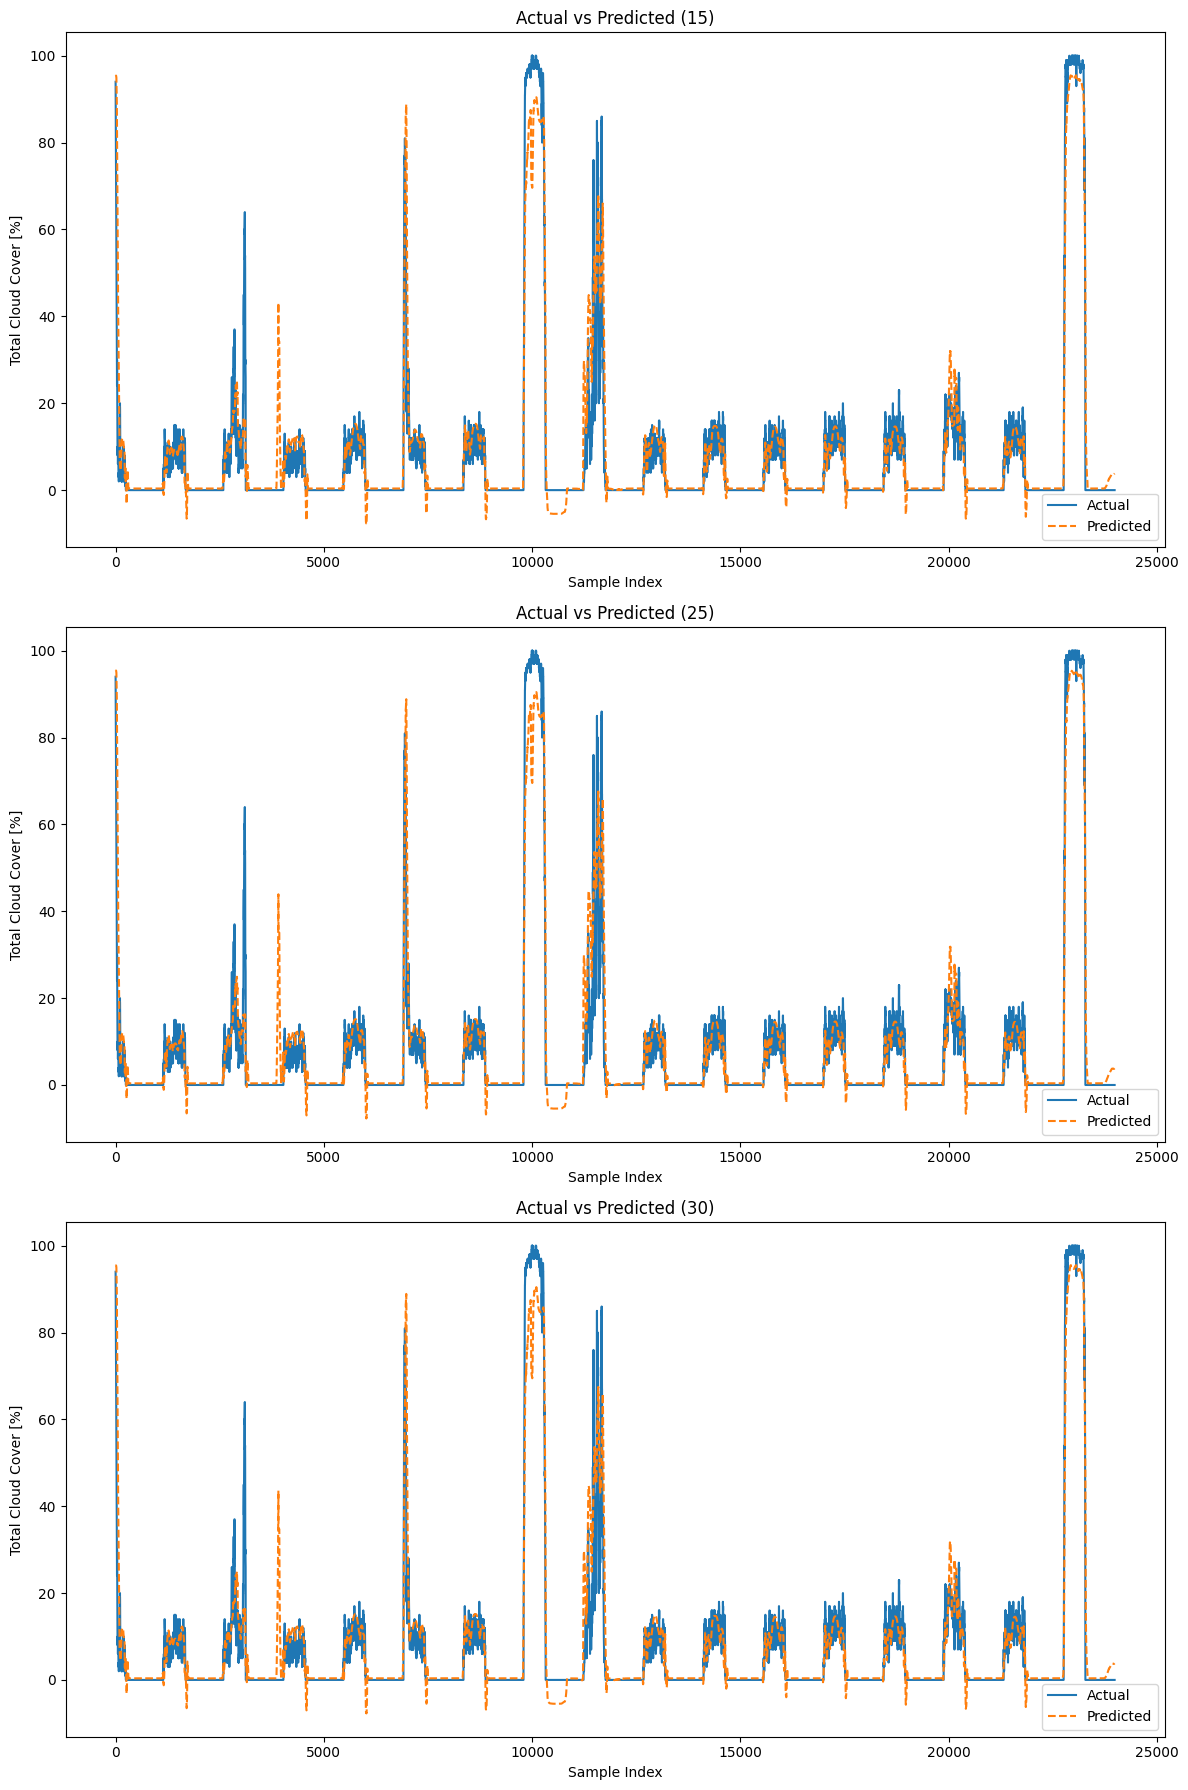

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sample_size = 200
for i, ax in enumerate(axes):
  ax.plot(y_test[:, i], label='Actual', linestyle='-')
  ax.plot(predictions[:, i], label='Predicted', linestyle='--')
  ax.set_xlabel('Sample Index')
  ax.set_ylabel('Total Cloud Cover [%]')
  ax.set_title(f'Actual vs Predicted ({y_index[i]})')
  ax.legend()

plt.tight_layout()
plt.show()


In [46]:
def evaluate(X, y, weights):
  y_pred = model.predict(X)
  mse_list, mae_list, r2_list = [], [], []
  for i in range(len(y_index)):
    mse = mean_squared_error(y[:, i], y_pred[:, i])
    mae = tf.keras.losses.MeanAbsoluteError()(y[:, i], y_pred[:, i])  # Use Keras MAE loss
    r2 = r2_score(y[:, i], y_pred[:, i])
    mse_list.append(mse * weights[i])
    mae_list.append(mae.numpy() * weights[i])  # Convert MAE tensor to numpy for calculation
    r2_list.append(r2 * weights[i])
  # Calculate weighted average
  weighted_mse = sum(mse_list)
  weighted_mae = sum(mae_list)
  weighted_r2 = sum(r2_list)
  return weighted_mse, weighted_mae, weighted_r2

In [47]:

weights = [0.5, 0.35, 0.15] 
weighted_mse,weighted_mae, weighted_r2 = evaluate(X_val, y_val, weights)
print(f"Weighted MSE (Validation): {weighted_mse}")
print(f"Weighted MAE (Validation): {weighted_mae}")
print(f"Weighted R2 (Validation): {weighted_r2}")

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Weighted MSE (Validation): 88.00818641747927
Weighted MAE (Validation): 3.8641291022300717
Weighted R2 (Validation): 0.8837799781078335


In [50]:
# unidirectional RNN model
input_seq_rnn = Input(shape=(sequence_length, X_train.shape[2]))
rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=True)(input_seq_rnn)
rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=True)(rnn_out)
rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=True)(rnn_out)
rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=False)(rnn_out)
output_rnn = Dense(len(y_index))(rnn_out)
model_rnn = Model(inputs=input_seq_rnn, outputs=output_rnn)

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 50, 64)         │         5,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 50, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 50, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,275 (118.26 KB)

 Trainable params: 30,275 (118.26 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
    9/13491 ━━━━━━━━━━━━━━━━━━━━ 3:27 15ms/step - loss: 1773.8861 

I0000 00:00:1719056320.157043     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13491/13491 ━━━━━━━━━━━━━━━━━━━━ 209s 15ms/step - loss: 1101.3967 - val_loss: 122.3633
Epoch 2/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 202s 15ms/step - loss: 208.9283 - val_loss: 107.9173
Epoch 3/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 202s 15ms/step - loss: 204.8268 - val_loss: 125.7890
Epoch 4/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 203s 15ms/step - loss: 198.8700 - val_loss: 136.4556
Epoch 5/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 207s 15ms/step - loss: 186.2041 - val_loss: 109.0499
Epoch 6/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 203s 15ms/step - loss: 213.6389 - val_loss: 125.6314
Epoch 7/10
13491/13491 ━━━━━━━━━━━━━━━━━━━━ 203s 15ms/step - loss: 185.5435 - val_loss: 108.1329


In [56]:
predictions=model_rnn(X_test)

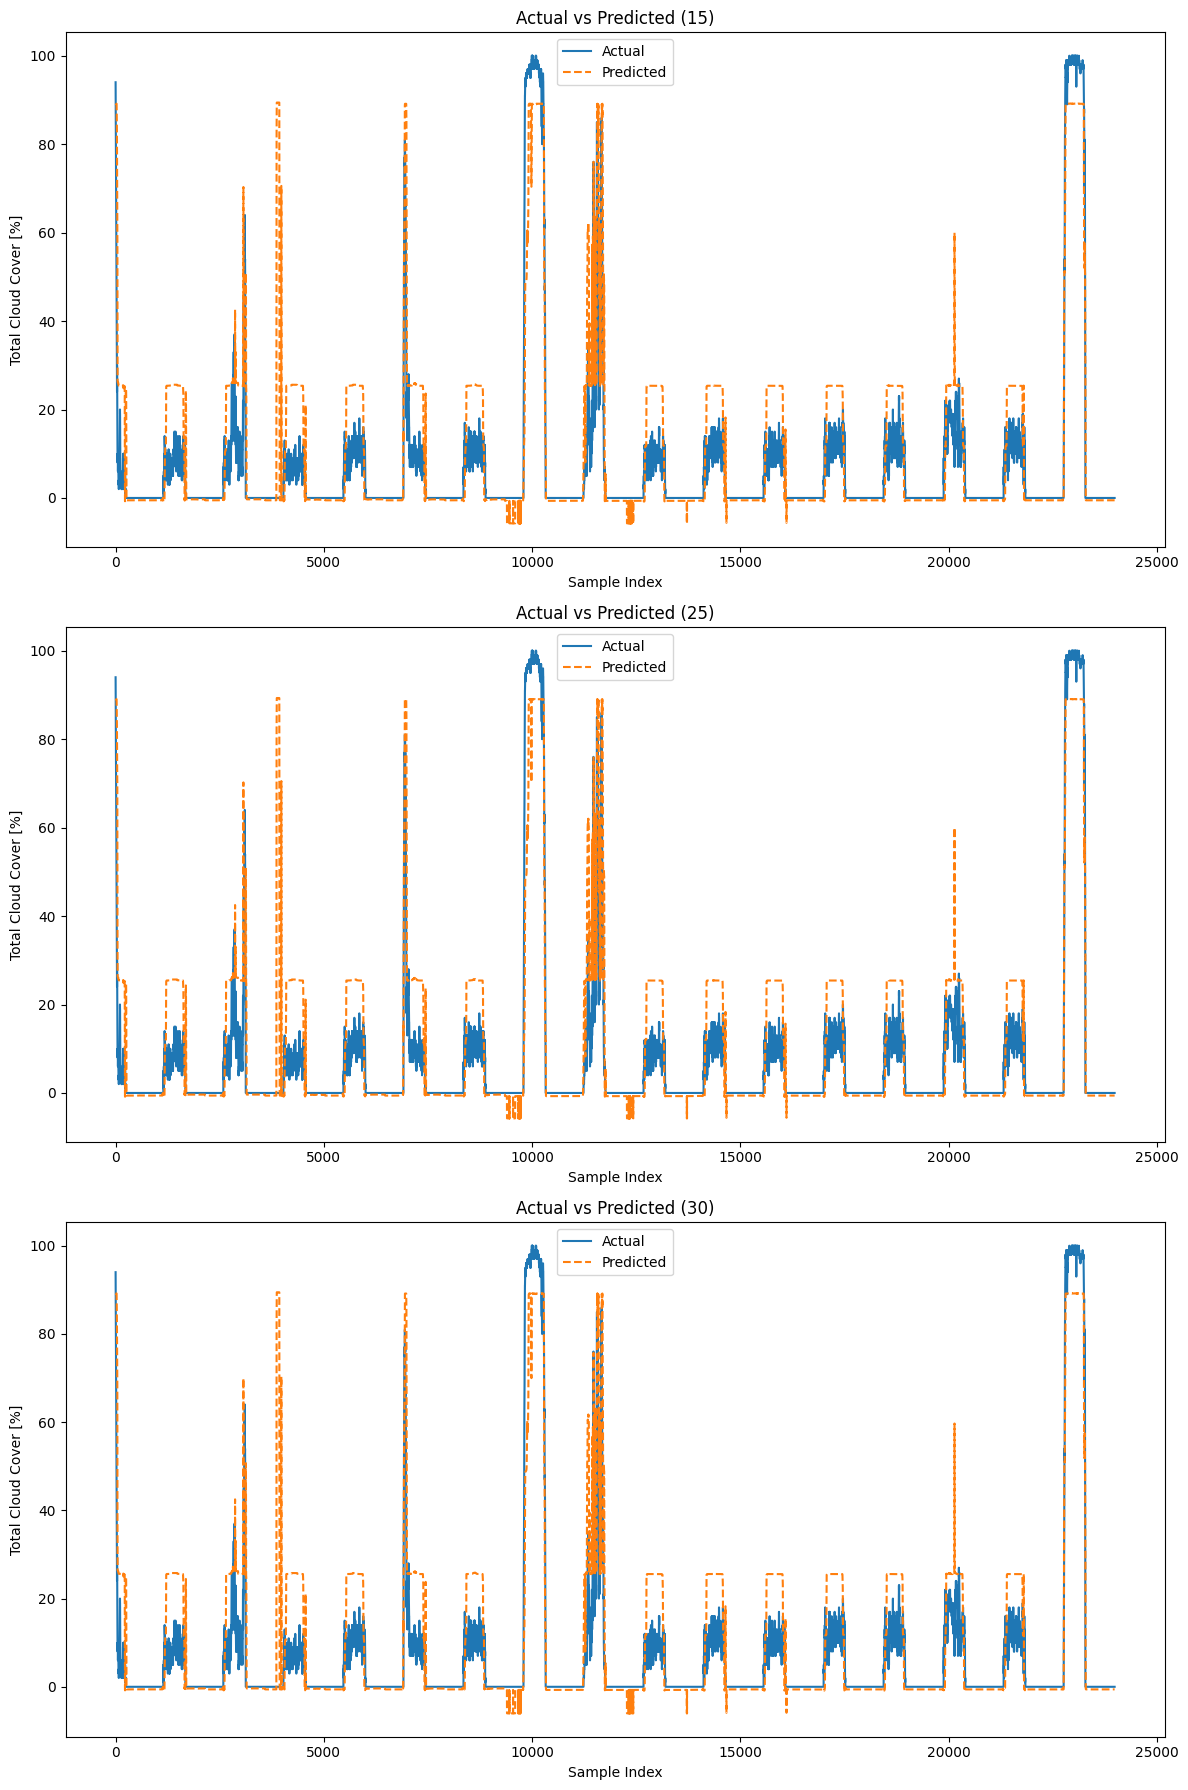

In [58]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
for i, ax in enumerate(axes):
  ax.plot(y_test[:, i], label='Actual', linestyle='-')
  ax.plot(predictions[:, i], label='Predicted', linestyle='--')
  ax.set_xlabel('Sample Index')
  ax.set_ylabel('Total Cloud Cover [%]')
  ax.set_title(f'Actual vs Predicted ({y_index[i]})')
  ax.legend()

plt.tight_layout()
plt.show()


In [55]:
model=model_rnn
weights = [0.5, 0.35, 0.15] 
weighted_mse,weighted_mae, weighted_r2 = evaluate(X_val, y_val, weights)
print(f"Weighted MSE (Validation): {weighted_mse}")
print(f"Weighted MAE (Validation): {weighted_mae}")
print(f"Weighted R2 (Validation): {weighted_r2}")

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Weighted MSE (Validation): 107.7980937186653
Weighted MAE (Validation): 5.342265892028808
Weighted R2 (Validation): 0.8576462335845969
